In [1]:
import matplotlib.pyplot as plt
import numpy as np

import alf.io
from brainbox.singlecell import peths

from oneibl.one import ONE

In [2]:
one = ONE()
eid = one.search(subject='KS004', date=['2019-09-25'], task_protocol='ephysChoiceWorld')[0]
datasets = one.load(eid, download_only=True)
ses_path = datasets[0].local_path.parent

Connected to https://alyx.internationalbrainlab.org as olivier


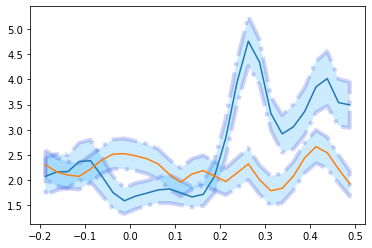

In [3]:
spikes = alf.io.load_object(ses_path, 'spikes')
trials = alf.io.load_object(ses_path, '_ibl_trials')

peth, bs = peths(spikes.times, spikes.clusters, [225, 52], trials.goCue_times)

plt.plot(peth.tscale, peth.means.T)

for m in np.arange(peth.means.shape[0]):
    plt.fill_between(peth.tscale,
                     peth.means[m, :].T - peth.stds[m, :].T / 20,
                     peth.means[m, :].T + peth.stds[m, :].T / 20,
                     alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
                     linewidth=4, linestyle='dashdot', antialiased=True)